In [95]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [102]:
data = pd.read_csv('imdb', parse_dates=['original_air_date'])
episode = pd.read_csv('episodes.csv', parse_dates=['original_air_date'])

In [103]:
data.head()

,season,episode_num,title,original_air_date,imdb_rating,total_votes,desc
0,1,1,The One Where Monica Gets a Roommate,1994-09-22,8.3,8378,"Monica and the gang introduce Rachel to the ""r..."
1,1,2,The One with the Sonogram at the End,1994-09-29,8.0,6441,Ross finds out his ex-wife is pregnant. Rachel...
2,1,3,The One with the Thumb,1994-10-06,8.1,6060,Monica becomes irritated when everyone likes h...
3,1,4,The One with George Stephanopoulos,1994-10-13,8.1,5892,Joey and Chandler take Ross to a hockey game t...
4,1,5,The One with the East German Laundry Detergent,1994-10-20,8.4,5872,"Eager to spend time with Rachel, Ross pretends..."


In [104]:
episode.tail()

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,prod_code,us_viewers
231,10,14,232,The One with Princess Consuela,Gary Halvorson,Story by: Robert CarlockTeleplay by: Tracy Reilly,2004-02-26,176263,22820000.0
232,10,15,233,The One Where Estelle Dies,Gary Halvorson,Story by: Mark KunerthTeleplay by: David Crane...,2004-04-22,176264,22640000.0
233,10,16,234,The One with Rachel's Going Away Party,Gary Halvorson,Andrew Reich & Ted Cohen,2004-04-29,176265,24510000.0
234,10,17,235,The Last One,Kevin S. Bright,Marta Kauffman & David Crane,2004-05-06,176266,52460000.0
235,10,18,236,The Last One part 2,Kevin S. Bright,Marta Kauffman & David Crane,2004-05-06,176267,52460000.0


In [105]:
data = data[['title', 'original_air_date', 'imdb_rating', 'total_votes', 'desc']]

all_df = episode.merge(data, how='left', on=['title', 'original_air_date'])

all_df

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,prod_code,us_viewers,imdb_rating,total_votes,desc
0,1,1,1,The One Where Monica Gets a Roommate,James Burrows,David Crane & Marta Kauffman,1994-09-22,456650,21500000.0,8.3,8378,"Monica and the gang introduce Rachel to the ""r..."
1,1,2,2,The One with the Sonogram at the End,James Burrows,David Crane & Marta Kauffman,1994-09-29,456652,20200000.0,8.0,6441,Ross finds out his ex-wife is pregnant. Rachel...
2,1,3,3,The One with the Thumb,James Burrows,Jeffrey Astrof & Mike Sikowitz,1994-10-06,456651,19500000.0,8.1,6060,Monica becomes irritated when everyone likes h...
3,1,4,4,The One with George Stephanopoulos,James Burrows,Alexa Junge,1994-10-13,456654,19700000.0,8.1,5892,Joey and Chandler take Ross to a hockey game t...
4,1,5,5,The One with the East German Laundry Detergent,Pamela Fryman,Jeff Greenstein & Jeff Strauss,1994-10-20,456653,18600000.0,8.4,5872,"Eager to spend time with Rachel, Ross pretends..."
...,...,...,...,...,...,...,...,...,...,...,...,...
231,10,14,232,The One with Princess Consuela,Gary Halvorson,Story by: Robert CarlockTeleplay by: Tracy Reilly,2004-02-26,176263,22820000.0,8.6,3953,When Phoebe goes to get her name changed she r...
232,10,15,233,The One Where Estelle Dies,Gary Halvorson,Story by: Mark KunerthTeleplay by: David Crane...,2004-04-22,176264,22640000.0,8.5,3700,Ross tries to get Rachel to go back to Ralph L...
233,10,16,234,The One with Rachel's Going Away Party,Gary Halvorson,Andrew Reich & Ted Cohen,2004-04-29,176265,24510000.0,8.9,4290,"The gang throws Rachel a goodbye party, during..."
234,10,17,235,The Last One,Kevin S. Bright,Marta Kauffman & David Crane,2004-05-06,176266,52460000.0,9.5,6221,Erica gives birth to the baby that Monica and ...


In [106]:
all_df['title']=all_df['title']
views = all_df.groupby(['title'])['us_viewers'].sum().reset_index()
views.head(5)


,title,us_viewers
0,The Last One,52460000.0
1,The Last One part 2,52460000.0
2,The One After I Do,31700000.0
3,The One After Joey and Rachel Kiss,24540000.0
4,The One After Ross Says Rachel,31120000.0


In [107]:
all_df['title']=all_df['title']
bottom = all_df.groupby(['title'])['us_viewers'].sum().reset_index()
bottom.tail(5)

,title,us_viewers
231,The One with the Ultimate Fighting Champion,23070000.0
232,The One with the Videotape,25580000.0
233,The One with the Vows,15650000.0
234,The One with the Worst Best Man Ever,23150000.0
235,The One with the Yeti,24990000.0


In [108]:
season_eps = all_df.groupby('season').count().original_air_date	.to_frame()
season_eps.columns = ['Episode Number']
season_eps

,Episode Number
season,
1,24
2,24
3,25
4,24
5,24
6,25
7,24
8,24
9,24


In [109]:
avg_view=all_df.us_viewers.mean()
max_view=all_df.us_viewers.max()
print('Rata-rata views yang di dapat dari seluruh video :','%d'%(avg_view),'\nviews terbanyak dari satu video yaitu :',max_view)

Rata-rata views yang di dapat dari seluruh video : 25390805 
views terbanyak dari satu video yaitu : 52900000.0


In [110]:
pop_eps10 = all_df[['title','imdb_rating']].sort_values('imdb_rating', ascending=False).head(10).reset_index(drop=True)
pop_eps10

,title,imdb_rating
0,The Last One part 2,9.7
1,The One Where Everybody Finds Out,9.7
2,The Last One,9.5
3,The One with the Embryos,9.5
4,The One with the Prom Video,9.4
5,The One with the Proposal: Part 2,9.3
6,The One with the Videotape,9.3
7,The One with the Rumor,9.3
8,The One with Monica and Chandler's Wedding: Pa...,9.2
9,The One with Ross's Wedding: Part 2,9.2


(9.0, 9.8)

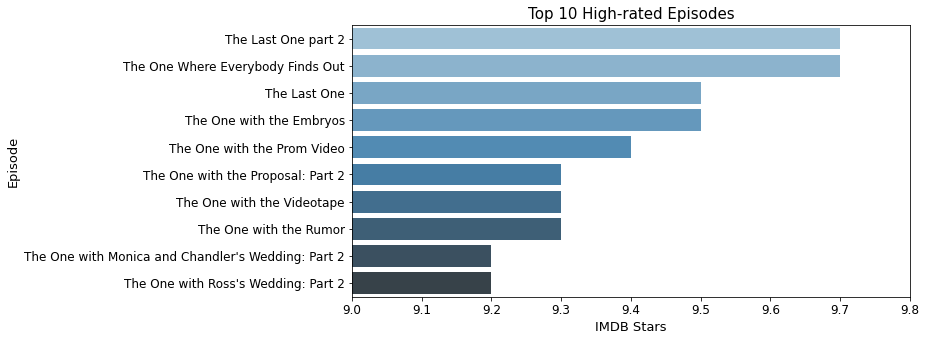

In [111]:
plt.figure(figsize=(10,5))
sns.barplot(y=pop_eps10.title, x=pop_eps10.imdb_rating, palette='Blues_d')
plt.title('Top 10 High-rated Episodes', fontsize=15)
plt.xlabel('IMDB Stars', fontsize=13)
plt.ylabel('Episode', fontsize=13)
plt.xticks(np.arange(9, 9.8, 0.1), fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(9, 9.8)

In [112]:
directed = all_df.directed_by.value_counts().to_frame().reset_index()
directed.columns = ['directed_by', 'title']
dir_rating = all_df.groupby('directed_by').imdb_rating.sum().to_frame().sort_values('imdb_rating', ascending=False).reset_index()
directed

,directed_by,title
0,Gary Halvorson,54
1,Kevin S. Bright,53
2,Michael Lembeck,24
3,James Burrows,15
4,Gail Mancuso,14
5,Peter Bonerz,12
6,Ben Weiss,10
7,David Schwimmer,10
8,Shelley Jensen,6
9,Robby Benson,6


In [117]:
dirs = dir_rating.merge(directed, how='left', on='directed_by')
dirs['Average'] = round(dirs.imdb_rating / dirs['title'], 2)
dirs_plt = dirs[dirs['title']>=10].sort_values('Average', ascending=False)

(8.0, 8.7)

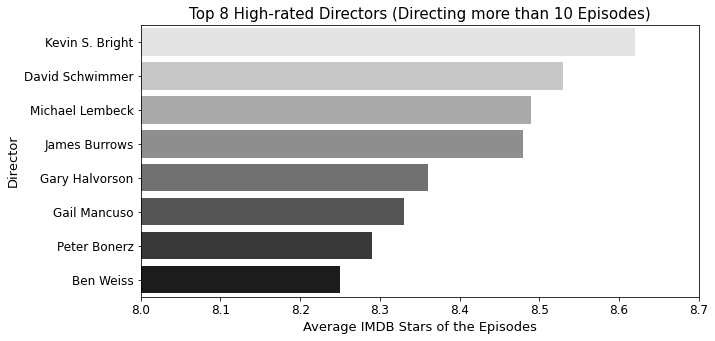

In [124]:
plt.figure(figsize=(10,5))
sns.barplot(y=dirs_plt.directed_by, x=dirs_plt.Average, palette='gist_gray_r')
plt.title('Top 8 High-rated Directors (Directing more than 10 Episodes)', fontsize=15)
plt.xlabel('Average IMDB Stars of the Episodes', fontsize=13)
plt.ylabel('Director', fontsize=13)
plt.xticks(np.arange(8, 8.8, 0.1), fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(8, 8.7)